In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Mall_Customers-2.csv")

print("Shape:", df.shape)
print(df.head())
print(df.info())

Shape: (200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
df = df.drop_duplicates()

In [6]:
features = ["Annual Income (k$)", "Spending Score (1-100)"]

X = df[features].copy()

print("\nSelected features preview:\n", X.head())


Selected features preview:
    Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

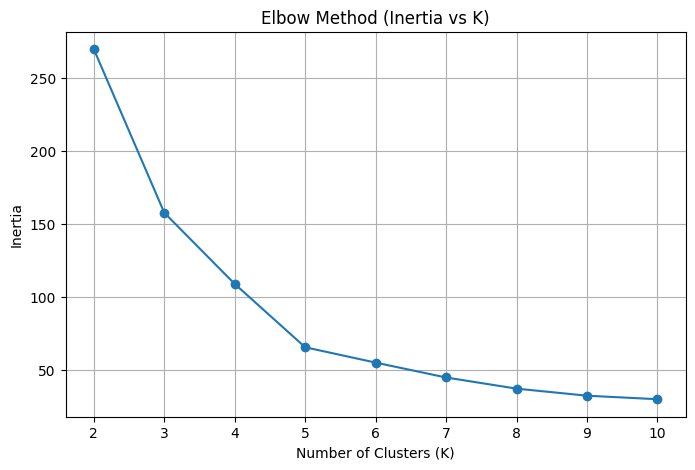

In [8]:
inertias = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(k_range), inertias, marker="o")
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [9]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

print("\nCluster counts:\n", df["Cluster"].value_counts())


Cluster counts:
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [10]:
sil_score = silhouette_score(X_scaled, clusters)
print("\nSilhouette Score:", sil_score)


Silhouette Score: 0.5546571631111091


# **VISUALIZATION**

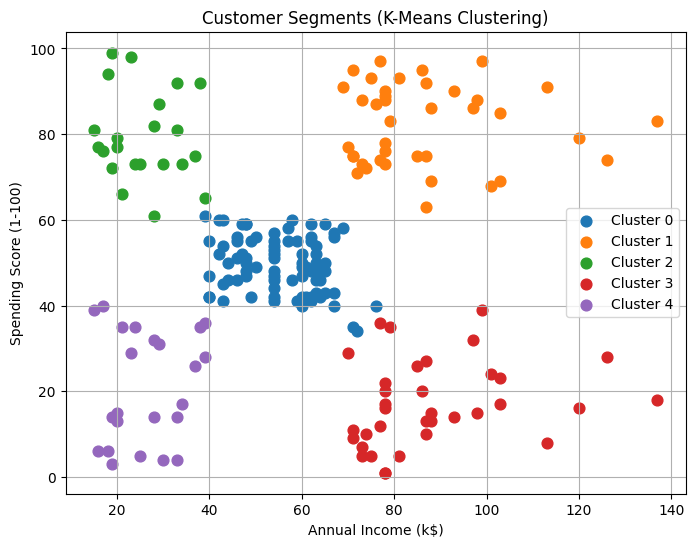

In [12]:
plt.figure(figsize=(8, 6))
for c in range(optimal_k):
    plt.scatter(
        df[df["Cluster"] == c]["Annual Income (k$)"],
        df[df["Cluster"] == c]["Spending Score (1-100)"],
        label=f"Cluster {c}",
        s=60
    )

plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()


Cluster Centers (Original Scale):
    Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


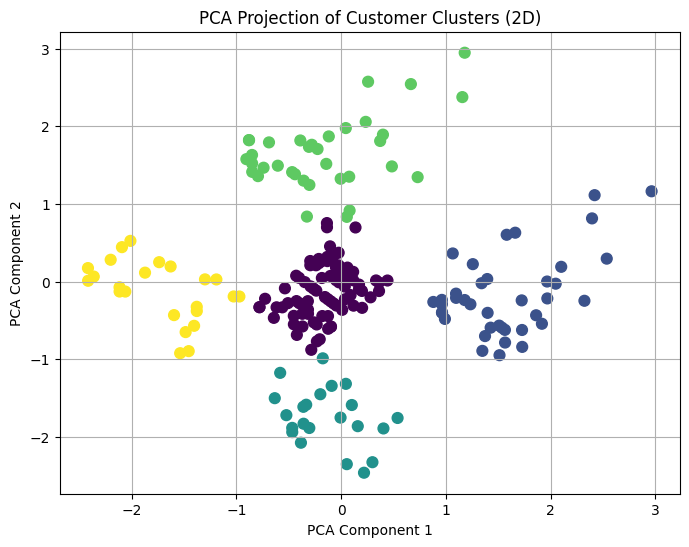

In [13]:
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

centers_df = pd.DataFrame(centers, columns=features)
print("\nCluster Centers (Original Scale):\n", centers_df)

# ----------------------------
# 10) Optional: PCA Visualization (2D)
# ----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=60)
plt.title("PCA Projection of Customer Clusters (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [14]:
summary = df.groupby("Cluster")[features].mean().round(2)
print("\nCluster Summary (Mean Values):\n", summary)


Cluster Summary (Mean Values):
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     55.30                   49.52
1                     86.54                   82.13
2                     25.73                   79.36
3                     88.20                   17.11
4                     26.30                   20.91


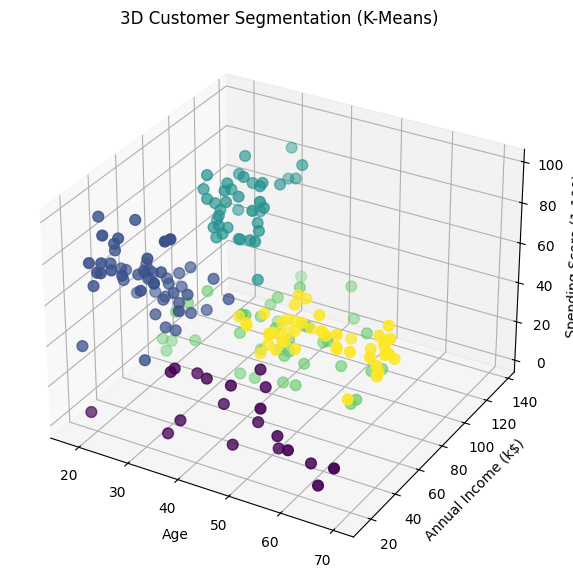

In [18]:
from mpl_toolkits.mplot3d import Axes3D

features_3d = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X3 = df[features_3d].copy()

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

optimal_k = 5
kmeans3 = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters3 = kmeans3.fit_predict(X3_scaled)

df["Cluster_3D"] = clusters3

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    df["Age"],
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster_3D"],
    s=60
)

ax.set_title("3D Customer Segmentation (K-Means)")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

# **INSIGHTS**

**Cluster 0: High Income and High Spending**

These customers are premium buyers who spend frequently and have strong purchasing power. They are ideal for luxury product promotions, membership programs, and exclusive offers.

**Cluster 1: High Income and Low Spending**

These customers have good income but spend less. They may need better engagement through personalized recommendations, discounts, or improved customer experience to increase spending.

**Cluster 2: Low Income and High Spending**

These customers spend actively despite having lower income. They respond well to affordable bundles, limited-time deals, and value-for-money offers.

**Cluster 3: Low Income and Low Spending**

These customers spend the least and have lower purchasing capacity. They are generally low priority for expensive marketing campaigns and are better targeted with low-cost promotions.

**Cluster 4: Medium Income and Medium Spending**

These customers show balanced behavior and are consistent buyers. They can be retained using loyalty rewards, regular offers, and seasonal promotions.